In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from shutil import rmtree
from pathlib import Path
from tqdm import tqdm
import pandas as pd
import numpy as np
import json



In [2]:
## test group 1
# test1 local provider one node same parameters, 64 threads
test1 = Path('/home/lizz_lab/cse12232433/project/colmena/multisite_/finetuning-surrogates/runs/save_runs/dft-md-23Sep16-062515-d68b07')

# test2 one node local provider with 4threads in sampling
test2 = Path('/home/lizz_lab/cse12232433/project/colmena/multisite_/finetuning-surrogates/runs/save_runs/dft-md-23Sep18-112842-d68b07')

## test group 2, new parameters, max threads vs 8 threads
test2_1 = Path('/home/lizz_lab/cse12232433/project/colmena/multisite_/finetuning-surrogates/runs/20230920_204954/dft-md-23Sep20-125003-d91b7e') # 8 threads
test2_2 = Path('/home/lizz_lab/cse12232433/project/colmena/multisite_/finetuning-surrogates/runs/20230920_205433/dft-md-23Sep20-125452-d987e1') # max threads


In [10]:
### Load the data
## for molecule design
task_type = ['inference-results', 'training-results', 'simulation-results']
task_color = {'run_simulation': 'blue', 'retrain_mpnn': 'red', 'evaluate_mpnn': 'yellow'}
def load_results(path: Path, task_type) -> pd.DataFrame:
    """Load the results from a run.
    
    Args:
        path: Path to the run directory.
    Returns:
        Dataframe of all results
    """
    
    # Loop over inference, training, and simulation results
    output = []
    for task in task_type:
        # Load the results
        data = path / f'{task}.json'
        assert data.is_file(), f'Could not find {data}'
        results = pd.read_json(data, lines=True)
        output.append(results)
    output = pd.concat(output)
    return output

def get_wct(results:pd.DataFrame) -> int:
    """get whole completion time.
    
    Args: 
        results dataframe of the workflow
    Returns:
        workflow completion time from task created to task results received.
    """
    start_time = results['time_created'].min()
    end_time = results['time_result_received'].max()
    return int(end_time - start_time)

In [20]:
def time_line_graph(results: pd.DataFrame, task_color: dict):
    """plot time_line_graph of each task.

    Args:
        results (pd.DataFrame): results object of the workflow from colmema.
        task_color (dict): color of each task.  
    """ 
    #### time line of task
    # rows = len(results)
    fig = plt.figure(figsize=(30, 20))
    task_timeline = results
    task_timeline.sort_values('time_compute_started', inplace=True, ignore_index=True)
    start_time = task_timeline['time_compute_started'].loc[0]
    wct = get_wct(task_timeline)
    plt.text(0, len(task_timeline)-1, f'Workflow completion time: {wct}', ha='left', va='center', fontsize=20, color='red')
    for index, row in task_timeline.iterrows():
        print(f"{row['method']}: {row['time_compute_started']}: {row['time_running']}")
        method = str(row['method'])+str(index)
        time = row['time_running']
        plt.barh(index, time, left=row['time_compute_started'] - start_time, color=task_color[row['method']])
        plt.text(row['time_compute_started'] - start_time, index, method, ha='left', va='center')
    
    plt.xlabel('Time')
    plt.ylabel('Task')
    plt.tight_layout()
    plt.show()

train: 1694845524.640427: 8.2380316319759
train: 1694845525.150848: 7.655424362979829
train: 1694845525.217167: 7.383905794995371
train: 1694845525.572249: 7.544049942982383
run_sampling: 1694845532.935544: 2.01400286500575
run_sampling: 1694845533.022124: 2.06867281004088
run_sampling: 1694845533.084572: 2.00102493603481
run_sampling: 1694845533.318296: 1.876485269982367
run_sampling: 1694845534.982023: 1.788307017995976
run_sampling: 1694845535.118685: 2.015003796026576
run_sampling: 1694845535.126163: 1.937648971041198
run_sampling: 1694845535.229356: 2.045009273977484
run_sampling: 1694845536.803575: 2.057518918998539
run_sampling: 1694845537.09717: 2.176408098021056
run_sampling: 1694845537.168483: 1.9530202579917382
run_sampling: 1694845537.306571: 2.029627693002112
run_sampling: 1694845538.900902: 2.053530674020294
run_sampling: 1694845539.147241: 2.193843901972286
run_sampling: 1694845539.304789: 1.953421548008918
run_sampling: 1694845539.366215: 1.9453555580112152
run_sampling

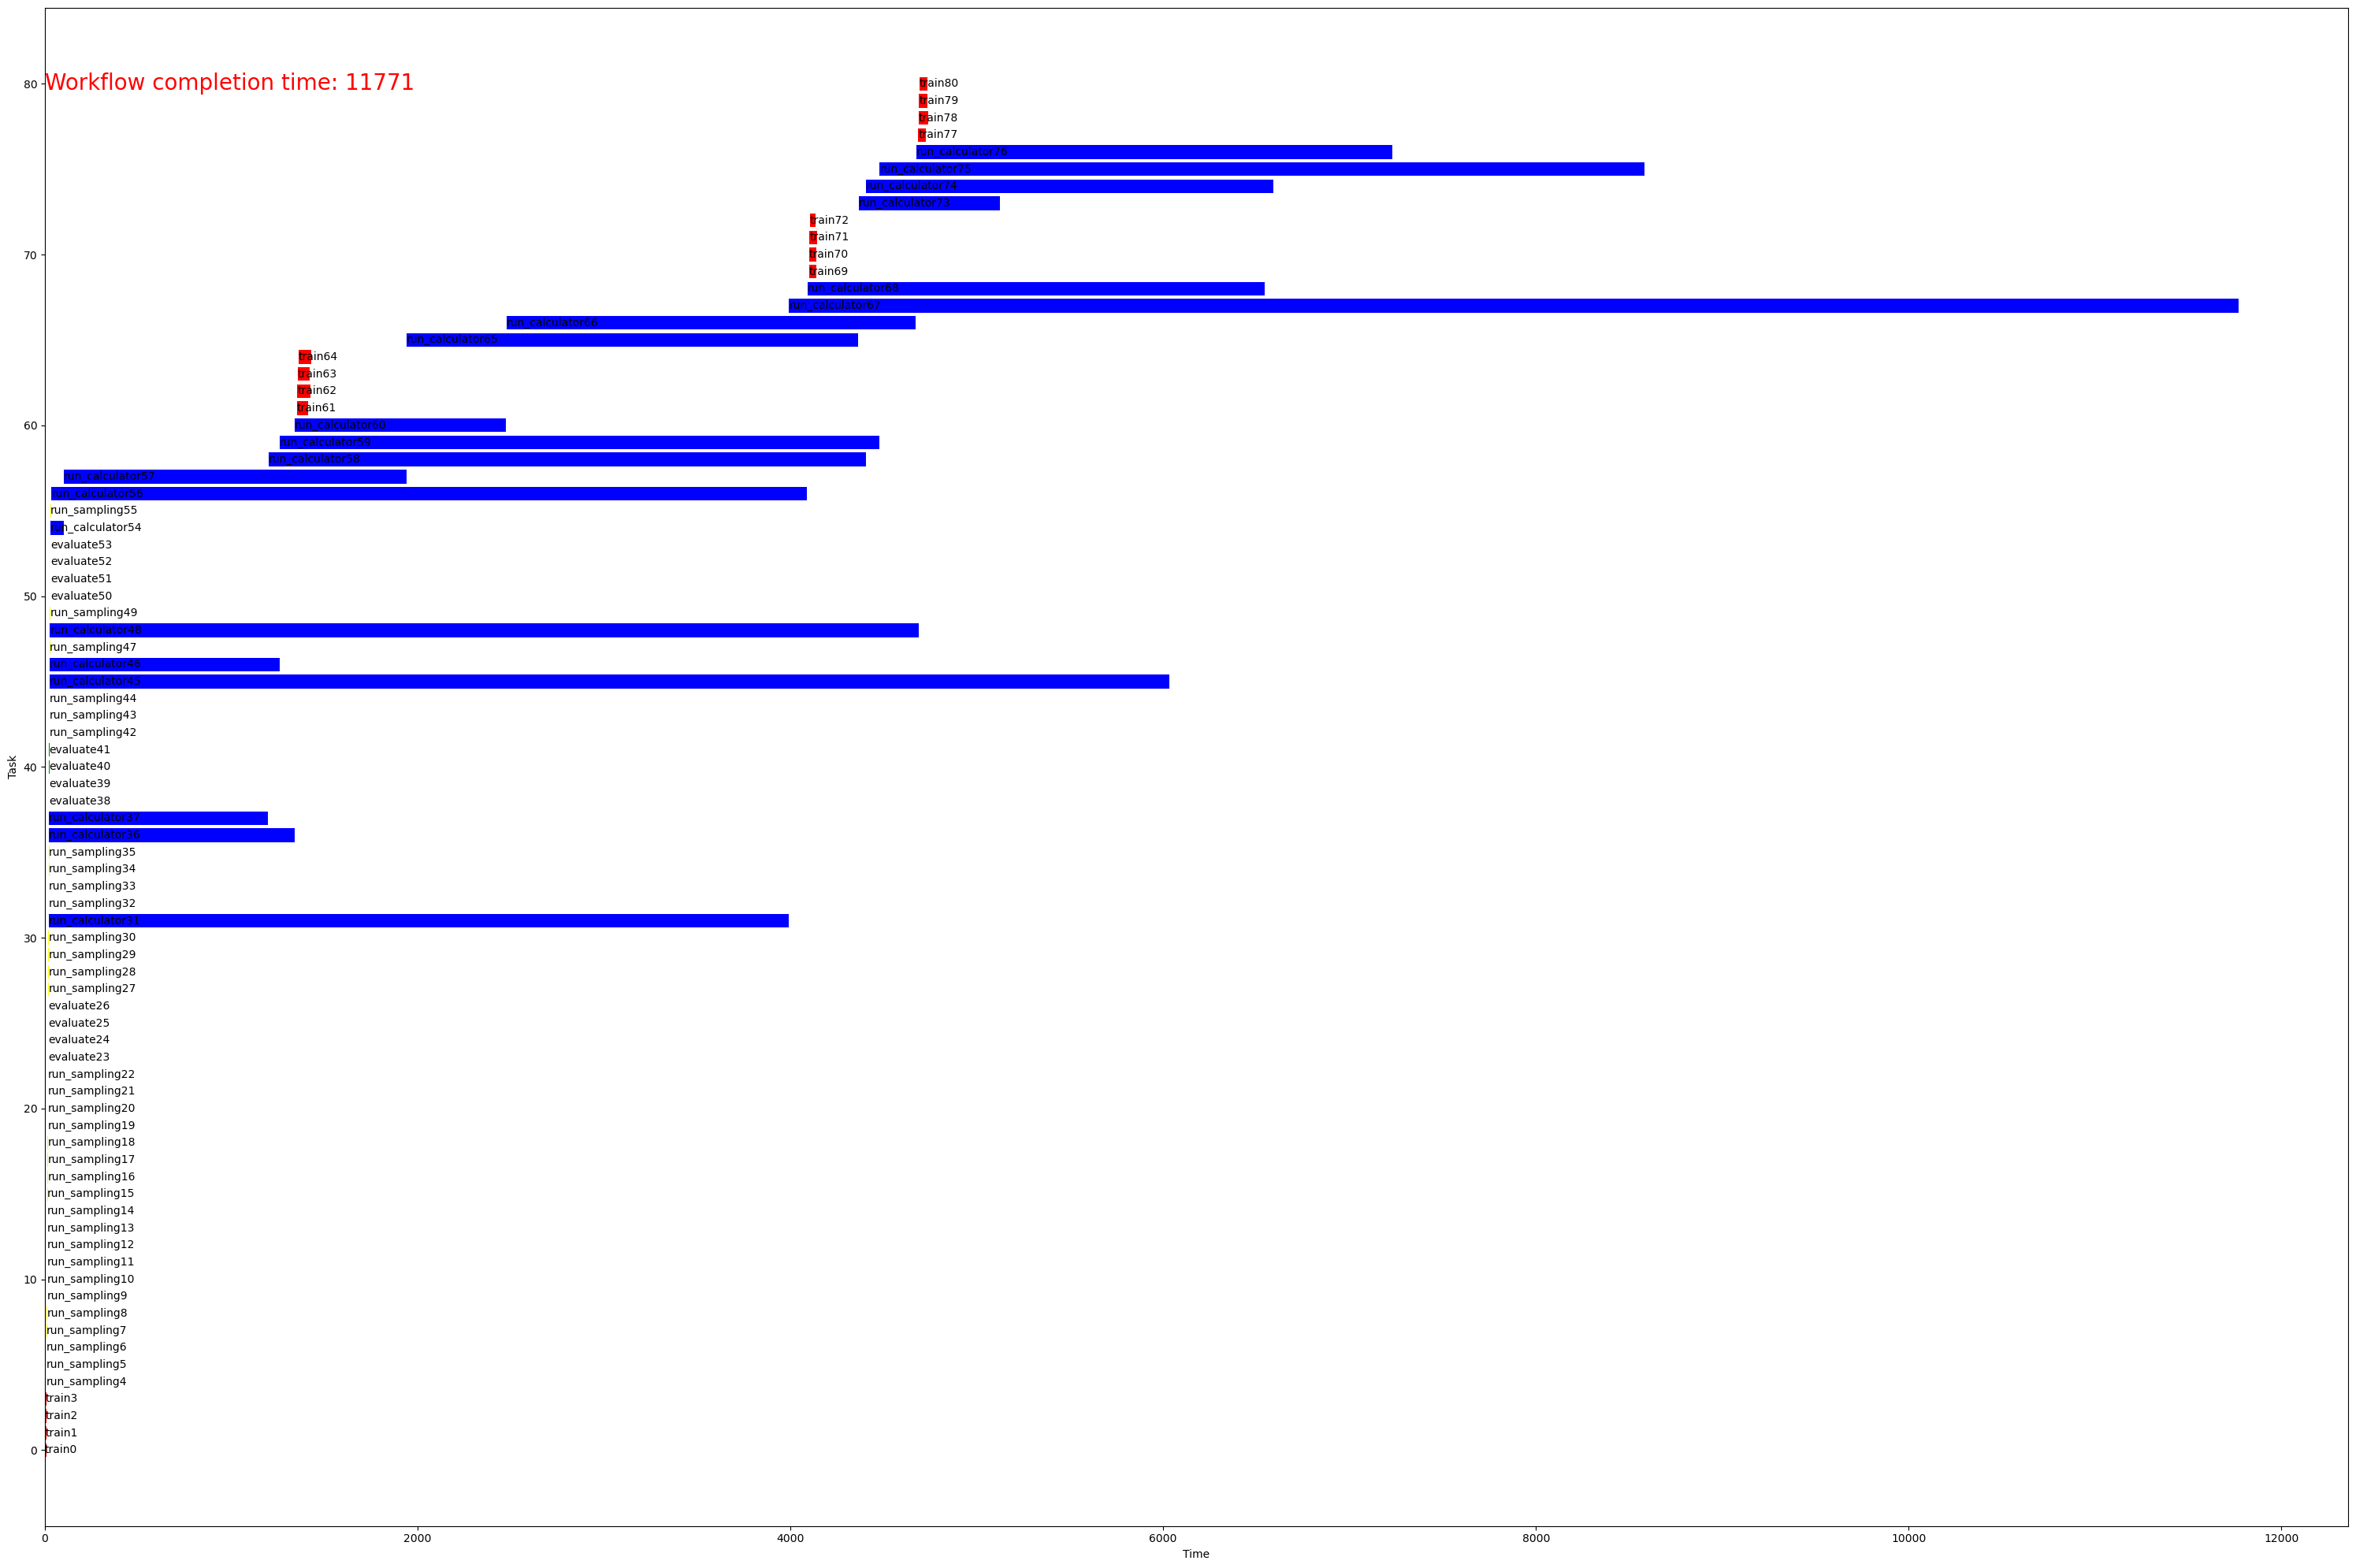

In [21]:
# fine-tuning surrogates
task_type = ['sampling-results', 'training-results', 'simulation-results', 'inference-results']
task_color = {'run_calculator': 'blue', 'train': 'red', 'run_sampling': 'yellow', 'evaluate': 'green'}
results = load_results(test1, task_type=task_type)
time_line_graph(results=results, task_color=task_color)

train: 1695036531.963228: 9.503871736000292
train: 1695036532.00212: 9.373642747057602
train: 1695036532.240705: 9.61582452908624
train: 1695036532.385181: 9.226045848918147
run_sampling: 1695036541.724867: 1.755990487989038
run_sampling: 1695036541.725402: 1.961033044965006
run_sampling: 1695036541.794346: 1.619459579000249
run_sampling: 1695036542.046092: 1.433582003926858
run_sampling: 1695036543.443942: 1.779547867015935
run_sampling: 1695036543.509894: 1.439813044038601
run_sampling: 1695036543.518605: 1.957347396062687
run_sampling: 1695036543.723228: 1.8319531489396461
run_sampling: 1695036544.981618: 1.4775523319840431
run_sampling: 1695036545.256995: 2.674353832029737
run_sampling: 1695036545.514912: 1.9136647100094701
run_sampling: 1695036545.596089: 1.7897932030027732
run_sampling: 1695036546.490718: 1.7258701950777322
run_sampling: 1695036547.424452: 1.9189682879950851
run_sampling: 1695036547.461847: 1.7558801730629052
run_sampling: 1695036547.966402: 2.398503080010414
run

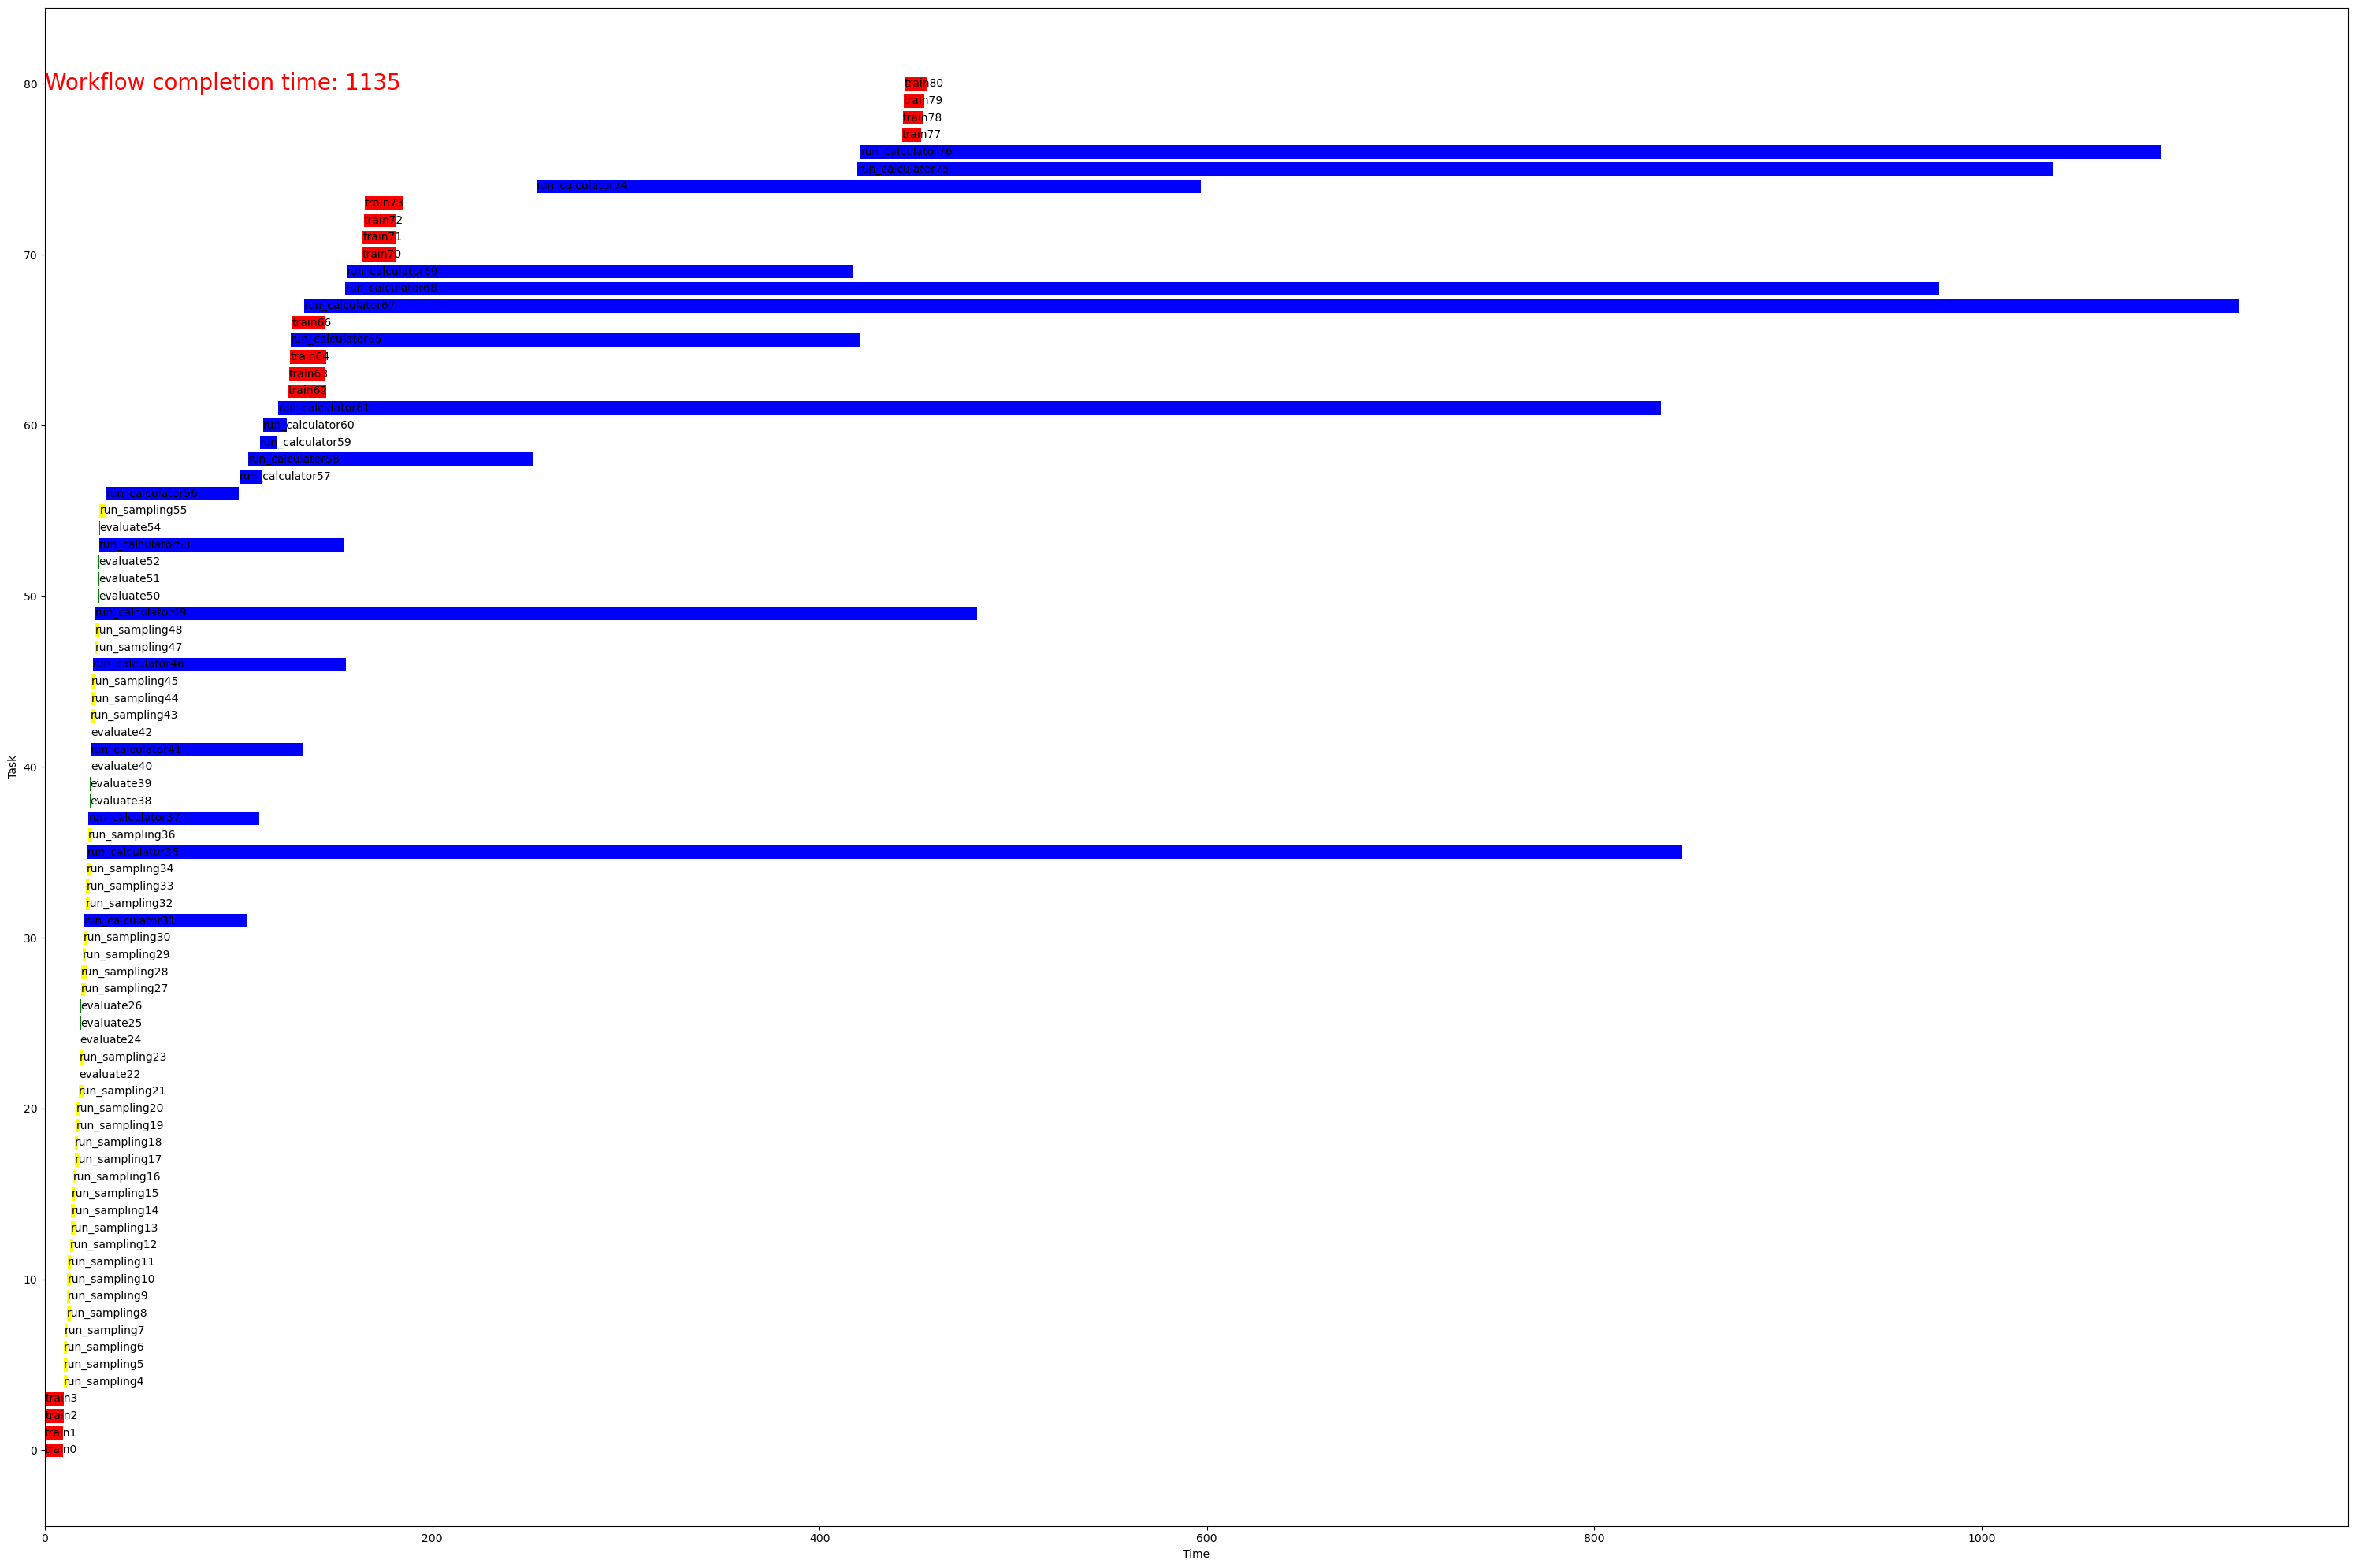

In [22]:
# fine-tuning surrogates
task_type = ['sampling-results', 'training-results', 'simulation-results', 'inference-results']
task_color = {'run_calculator': 'blue', 'train': 'red', 'run_sampling': 'yellow', 'evaluate': 'green'}
results = load_results(test2, task_type=task_type)
time_line_graph(results=results, task_color=task_color)

In [7]:
### task on nodes and gpu
row_count = len(results)
print(row_count)

81
